In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [117]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Get number of instances for each class

airplane_count = 0
automobile_count = 0
bird_count = 0
cat_count = 0
deer_count = 0
dog_count = 0
frog_count = 0
horse_count = 0
ship_count = 0
truck_count = 0

for sample in y_train:
    if sample == 0:
        airplane_count += 1
    elif sample == 1:
        automobile_count += 1
    elif sample == 2:
        bird_count += 1
    elif sample == 3:
        cat_count += 1
    elif sample == 4:
        deer_count += 1
    elif sample == 5:
        dog_count += 1
    elif sample == 6:
        frog_count += 1
    elif sample == 7:
        horse_count += 1
    elif sample == 8:
        ship_count += 1
    elif sample == 9:
        truck_count += 1
        
print(f'Number of samples of the class airplane: {airplane_count}')
print(f'Number of samples of the class automobile: {automobile_count}')
print(f'Number of samples of the class bird: {bird_count}')
print(f'Number of samples of the class cat: {cat_count}')
print(f'Number of samples of the class deer: {deer_count}')
print(f'Number of samples of the class dog: {dog_count}')
print(f'Number of samples of the class frog: {frog_count}')
print(f'Number of samples of the class horse: {horse_count}')
print(f'Number of samples of the class ship: {ship_count}')
print(f'Number of samples of the class truck: {truck_count}')

print('The dataset is completely balanced')


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
Number of samples of the class airplane: 5000
Number of samples of the class automobile: 5000
Number of samples of the class bird: 5000
Number of samples of the class cat: 5000
Number of samples of the class deer: 5000
Number of samples of the class dog: 5000
Number of samples of the class frog: 5000
Number of samples of the class horse: 5000
Number of samples of the class ship: 5000
Number of samples of the class truck: 5000
The dataset is completely balanced


In [118]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras.datasets.fashion_mnist as fashion_mnist

def preprocess_data_cifar10(x_train, y_train_1, x_test, y_test_1):
    
    new_x_train = list()
    new_y_train = list()
    new_x_test = list()
    new_y_test = list()
    airplane_count, automobile_count, bird_count, cat_count, deer_count, dog_count, frog_count, horse_count, ship_count, truck_count = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    
    
    # First, samples of two classes of animals are erased from data. This is done because the second task to 
    # be performed is classifying between animals and vehicles. This way, the dataset will be balanced for both tasks
    for train_sample, label in zip(x_train, y_train_1):
        if label not in [4, 7]:
            new_x_train.append(train_sample)
            new_y_train.append(label)
            
    for test_sample, test_label in zip(x_test, y_test_1):
        if test_label not in [4, 7]:
            new_x_test.append(test_sample)
            new_y_test.append(test_label)
            
    x_train = np.array(new_x_train)
    x_test = np.array(new_x_test)
    y_train_1 = np.array(new_y_train)
    y_test_1 = np.array(new_y_test)
    
    print('\nUnique labels before processing')
    print(np.unique(y_train_1))
    print(np.unique(y_test_1))
    
    # Make all labels go from 0 to 7 (right now the unqieu values of y are [0 1 2 3 5 6 8 9], but we want [0 1 2 3 4 5 6 7])
    new_y_train_1 = list()
    for train_label in y_train_1:
        if train_label == 5:
            new_y_train_1.append(4)
        elif train_label == 6:
            new_y_train_1.append(5)
        elif train_label == 8:
            new_y_train_1.append(6)
        elif train_label == 9:
            new_y_train_1.append(7)
        else:
            new_y_train_1.append(int(train_label))
            
    new_y_test_1 = list()
    for test_label in y_test_1:
        if test_label == 5:
            new_y_test_1.append(4)
        elif test_label == 6:
            new_y_test_1.append(5)
        elif test_label == 8:
            new_y_test_1.append(6)
        elif test_label == 9:
            new_y_test_1.append(7)
        else:
            new_y_test_1.append(int(test_label))
    
    y_train_1 = np.array(new_y_train_1)
    y_test_1 = np.array(new_y_test_1)
            
    print('\nUnique labels after processing')
    print(np.unique(y_train_1))
    print(np.unique(y_test_1))
    
    n_class_1 = 8
    
    # 0 = animal, 1 = vehicle
    y_train_2 = [0 if y in [2, 3, 4, 5] else 1 for y in y_train_1]
    y_test_2 = [0 if y in [2, 3, 4, 5] else 1 for y in y_test_1]
    
    n_class_2 = 2
    
    for label in y_train_1:
        if label == 0:
            airplane_count += 1
        elif label == 1:
            automobile_count += 1
        elif label == 2:
            bird_count += 1
        elif label == 3:
            cat_count += 1
        elif label == 4:
            dog_count += 1
        elif label == 5:
            frog_count += 1
        elif label == 6:
            ship_count += 1
        elif label == 7:
            truck_count += 1
        
    print(f'Number of samples of the class airplane: {airplane_count}')
    print(f'Number of samples of the class automobile: {automobile_count}')
    print(f'Number of samples of the class bird: {bird_count}')
    print(f'Number of samples of the class cat: {cat_count}')
    print(f'Number of samples of the class dog: {dog_count}')
    print(f'Number of samples of the class frog: {frog_count}')
    print(f'Number of samples of the class ship: {ship_count}')
    print(f'Number of samples of the class truck: {truck_count}')
    
    y_train_1 = to_categorical(y_train_1, n_class_1)
    y_test_1 = to_categorical(y_test_1, n_class_1)
    y_train_2 = to_categorical(y_train_2, n_class_2)
    y_test_2 = to_categorical(y_test_2, n_class_2)
    
    return x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2

x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = preprocess_data_cifar10(x_train, y_train, x_test, y_test)

print(x_train.shape)
print(y_train_1.shape)
print(y_train_2.shape)
print(x_test.shape)
print(y_test_1.shape)
print(y_test_2.shape)


Unique labels before processing
[0 1 2 3 5 6 8 9]
[0 1 2 3 5 6 8 9]

Unique labels after processing
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]
Number of samples of the class airplane: 5000
Number of samples of the class automobile: 5000
Number of samples of the class bird: 5000
Number of samples of the class cat: 5000
Number of samples of the class dog: 5000
Number of samples of the class frog: 5000
Number of samples of the class ship: 5000
Number of samples of the class truck: 5000
(40000, 32, 32, 3)
(40000, 8)
(40000, 2)
(8000, 32, 32, 3)
(8000, 8)
(8000, 2)


#### Classes 'Deer' and 'Horse' have been successfully deleted from the dataset, while still keeping it balanced

In [ ]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

y_train = train_data['label']
x_train = train_data.drop('label', axis=1)
y_test = test_data['label']
x_test = test_data.drop('label', axis=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Get data as numpy arrays and reshape it
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (60000, 28, 28))
x_test = np.reshape(x_test, (10000, 28, 28))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras.datasets.fashion_mnist as fashion_mnist

def preprocess_data_fashion_mnist(x_train, y_train_1, x_test, y_test_1):
    
    n_class_1 = 10
    
    y_train_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in y_train_1)
    y_test_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in y_test_1)
    
    n_class_2 = 3
    
    x_train = np.expand_dims(x_train, axis=3)
    x_test = np.expand_dims(x_test, axis=3)
    y_train_1 = to_categorical(y_train_1, n_class_1)
    y_test_1 = to_categorical(y_test_1, n_class_1)
    y_train_2 = to_categorical(y_train_2, n_class_2)
    y_test_2 = to_categorical(y_test_2, n_class_2)
    
    return x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2

x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = preprocess_data_fashion_mnist(x_train, y_train, x_test, y_test)

print(x_train.shape)
print(y_train_1.shape)
print(y_train_2.shape)
print(x_test.shape)
print(y_test_1.shape)
print(y_test_2.shape)

In [119]:
# Build model

def generate_model(gamma):

    inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input')

    main_branch = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1)(inputs)
    main_branch = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(main_branch)
    main_branch = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1)(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(main_branch)
    main_branch = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1)(main_branch)
    main_branch = tf.keras.layers.Flatten()(main_branch)
    main_branch = tf.keras.layers.Dense(3136, activation='relu')(main_branch)

    task_1_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    task_1_branch = tf.keras.layers.Dense(100, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(8, activation='softmax', name='task_1_output')(task_1_branch)


    task_2_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    task_2_branch = tf.keras.layers.Dense(100, activation='relu')(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(2, activation='sigmoid', name='task_2_output')(task_2_branch)

    model = tf.keras.Model(inputs = inputs, outputs = [task_1_branch, task_2_branch])

    model.compile(optimizer='adam',
                  loss={'task_1_output': 'categorical_crossentropy', 'task_2_output': 'categorical_crossentropy'},
                  loss_weights={'task_1_output': gamma, 'task_2_output': 1 - gamma}, metrics=['accuracy'])
    
    return model


In [120]:
import time

def fit_batch(gamma_values):
    
    history = list()
    trained_models = list()
    
    for gamma in gamma_values:
        
        print('Training model for gamma equal to ', gamma)
        model = generate_model(gamma)
        start = time.time()
        model_history = model.fit({'input': x_train},
                            {'task_1_output': y_train_1, 'task_2_output': y_train_2},
                            epochs=10, batch_size=128, verbose=0)
        print(f'Training time: {time.time() - start}')
        history.append(model_history)
        trained_models.append(model)
        
    return history, trained_models
        

In [121]:
gammas = [0., 0.25, 0.5, 0.75, 1.]
training_history, trained_models = fit_batch(gammas)

Training model for gamma equal to  0.0
Training time: 298.46324396133423
Training model for gamma equal to  0.25
Training time: 284.2997610569
Training model for gamma equal to  0.5
Training time: 277.9187562465668
Training model for gamma equal to  0.75
Training time: 279.8697454929352
Training model for gamma equal to  1.0
Training time: 276.4491112232208



Plotting Accuracy vs Epochs for each value of gamma

High values of gamma means that the model weights more the loss of Task 1, whereas low values mean that it weights more the loss of Task 2

Plotting Accuracy vs Epochs for value of gamma number 0.0



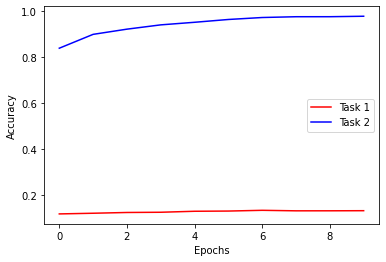


Plotting Accuracy vs Epochs for value of gamma number 0.25



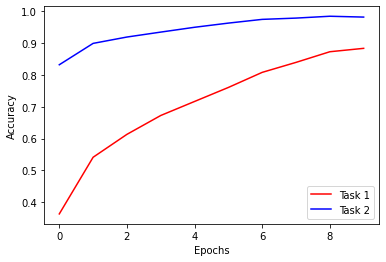


Plotting Accuracy vs Epochs for value of gamma number 0.5



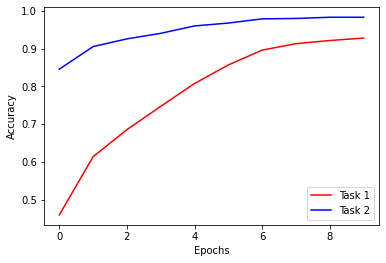


Plotting Accuracy vs Epochs for value of gamma number 0.75



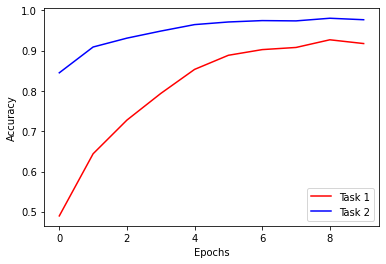


Plotting Accuracy vs Epochs for value of gamma number 1.0



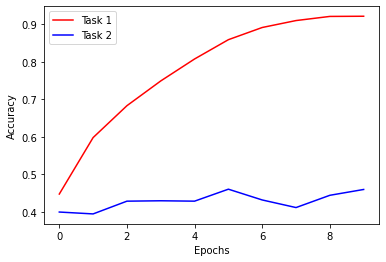

In [122]:
import matplotlib.pyplot as plt

print('\nPlotting Accuracy vs Epochs for each value of gamma\n')
print('High values of gamma means that the model weights more the loss of Task 1, '
      'whereas low values mean that it weights more the loss of Task 2')
counter = 0

for history in training_history:
    
    print(f'\nPlotting Accuracy vs Epochs for value of gamma number {gammas[counter]}\n')
    plt.plot(range(len(history.history['task_1_output_accuracy'])), history.history['task_1_output_accuracy'], c='r', label='Task 1')
    plt.plot(range(len(history.history['task_2_output_accuracy'])), history.history['task_2_output_accuracy'], c='b', label='Task 2')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    counter += 1
    

(1, 32, 32, 3)


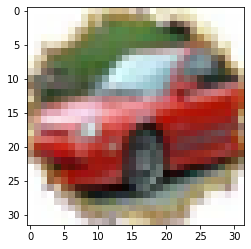

In [123]:
import random

# Pick random image of test data, which will be used to evaluate each task
random_ind = random.randrange(0, x_test.shape[0], 1)
image = x_test[random_ind,:,:,:]
plt.imshow(image)

image = np.expand_dims(image, axis=0)
print(image.shape)


In [124]:
# Get prediction for both tasks, and compare them to the real classes 
# (predictions will be done on the model trained with gamma=0.5)

trained_model = trained_models[2]
trained_model.predict(image)

[array([[1.3812565e-13, 9.9953687e-01, 1.7757532e-15, 5.1700832e-16,
         6.9439042e-12, 6.4857941e-18, 3.9787417e-13, 4.6309351e-04]],
       dtype=float32), array([[1.6622039e-15, 2.6085347e-02]], dtype=float32)]

### Test the model for several images

In [133]:
def test_image(x_test):
        
        # Pick random image of test data, which will be used to evaluate each task
        random.seed(time.clock())
        random_ind = int(random.random() * x_test.shape[0])
        print(random_ind)
        image = x_test[random_ind,:,:,:]
        plt.imshow(image)

        image = np.expand_dims(image, axis=0)
        print(image.shape)

        trained_model = trained_models[2]
        print(trained_model.predict(image))

7154
(1, 32, 32, 3)
[array([[4.3099996e-10, 5.4984690e-07, 7.1168811e-06, 2.6220265e-03,
        1.3945424e-05, 9.9735582e-01, 2.6573330e-08, 5.6633763e-07]],
      dtype=float32), array([[6.2880659e-01, 3.6846664e-06]], dtype=float32)]


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


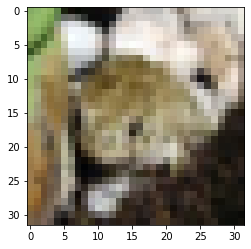

In [134]:
test_image(x_test)

In [138]:
trained_models[2].evaluate(x_test, {'task_1_output': y_test_1, 'task_2_output': y_test_2})

250/250 [==============================] - 2s 9ms/step - loss: 0.9447 - task_1_output_loss: 1.5401 - task_2_output_loss: 0.3494 - task_1_output_accuracy: 0.6639 - task_2_output_accuracy: 0.9229


[0.9447342157363892,
 1.5400625467300415,
 0.34940674901008606,
 0.6638749837875366,
 0.9228749871253967]

### Evaluate the whole test dataset on the trained models

In [139]:
for i, gamma in enumerate(gammas):
    evaluation = trained_models[i].evaluate(x_test, 
                                            {'task_1_output': y_test_1, 'task_2_output': y_test_2})
    print(f'Evaluation for models trained with gamma={gamma}.\nTask 1: {evaluation[-2]}\nTask 2: {evaluation[-1]}')

250/250 [==============================] - 2s 9ms/step - loss: 0.3390 - task_1_output_loss: 4.4572 - task_2_output_loss: 0.3390 - task_1_output_accuracy: 0.1270 - task_2_output_accuracy: 0.8989
Evaluation for models trained with gamma=0.0.
Task 1: 0.12700000405311584
Task 2: 0.8988749980926514
250/250 [==============================] - 2s 9ms/step - loss: 0.5475 - task_1_output_loss: 1.3754 - task_2_output_loss: 0.2715 - task_1_output_accuracy: 0.6423 - task_2_output_accuracy: 0.9220
Evaluation for models trained with gamma=0.25.
Task 1: 0.6422500014305115
Task 2: 0.921999990940094
250/250 [==============================] - 2s 9ms/step - loss: 0.9447 - task_1_output_loss: 1.5401 - task_2_output_loss: 0.3494 - task_1_output_accuracy: 0.6639 - task_2_output_accuracy: 0.9229
Evaluation for models trained with gamma=0.5.
Task 1: 0.6638749837875366
Task 2: 0.9228749871253967
250/250 [==============================] - 3s 9ms/step - loss: 1.0938 - task_1_output_loss: 1.3655 - task_2_output_lo